In [26]:
%matplotlib notebook
# https://stackoverflow.com/questions/43599018/is-there-a-way-to-get-matplotlib-path-contains-points-to-be-inclusive-of-boundar
#I do quite like this command in Jupiter notebook:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
#It makes things wider and not waste the space on your screen
import pandas as pd
import importlib
import csv,os
import numpy as np
import pandas as pd
import itertools
import pyproj
import shapely
import copy
from uafgi import gicollections,cfutil,glacier,gdalutil,shputil
import uafgi.data.ns642
import netCDF4
import matplotlib.pyplot as plt
import uafgi.data.wkt
import uafgi.data.w21 as d_w21
map_wkt = uafgi.data.wkt.nsidc_ps_north
pd.set_option("display.max_rows", 30, "display.max_columns", None)

In [4]:
#importlib.reload(d_w21)

select = pd.read_pickle(uafgi.data.join_outputs('stability', '03_select.df'))
advance = pd.read_pickle('advance.df')

In [5]:
select.columns

Index(['w21_popular_name', 'w21_greenlandic_name', 'w21_coast', 'w21_category',
       'w21_Qr', 'w21_Qf', 'w21_Qm', 'w21_Qs', 'w21_Qc_inferred', 'w21_qm',
       'w21_qf', 'w21_qc', 'w21_mean_depth', 'w21_min_depth',
       'w21_quality_str', 'w21_area_grounded_1992_2017',
       'w21_area_grounded_1992_1997', 'w21_area_grounded_1998_2007',
       'w21_area_grounded_2008_2017', 'w21_mean_fjord_width',
       'w21_length_grounded_1992_2017', 'w21_length_grounded_1992_1997',
       'w21_length_grounded_1998_2007', 'w21_length_grounded_2008_2017',
       'w21_ocean_model_sample_area', 'w21_mean_TF_1992-2017',
       'w21_mean_TF_1992-1997', 'w21_mean_TF_1998-2007',
       'w21_mean_TF_2008-2017', 'w21_subglacial_discharge_1992_2017',
       'w21_subglacial_discharge_1992_1997',
       'w21_subglacial_discharge_1998_2007',
       'w21_subglacial_discharge_2008_2017', 'w21_mean_xsection_area',
       'w21_mean_undercutting_1992_2017', 'w21_mean_undercutting_1992_1997',
       'w21_mean_und

In [11]:
advance

,w21t_key,year,velocity_source,aflux
0,F Graae,2011,ItsliveMerger,1317.844851
0,F Graae,2011,W21Merger,1183.912681
1,F Graae,2012,ItsliveMerger,1224.681881
1,F Graae,2012,W21Merger,1001.102951
2,F Graae,2013,ItsliveMerger,1156.493710
...,...,...,...,...
6,Ussing Braeer,2017,ItsliveMerger,742.509308
6,Ussing Braeer,2017,W21Merger,880.650263
7,Ussing Braeer,2018,ItsliveMerger,787.610140
7,Ussing Braeer,2018,W21Merger,880.650263


In [41]:
select = select[select.w21t_key == 'Store']
select

,w21_popular_name,w21_greenlandic_name,w21_coast,w21_category,w21_Qr,w21_Qf,w21_Qm,w21_Qs,w21_Qc_inferred,w21_qm,w21_qf,w21_qc,w21_mean_depth,w21_min_depth,w21_quality_str,w21_area_grounded_1992_2017,w21_area_grounded_1992_1997,w21_area_grounded_1998_2007,w21_area_grounded_2008_2017,w21_mean_fjord_width,w21_length_grounded_1992_2017,w21_length_grounded_1992_1997,w21_length_grounded_1998_2007,w21_length_grounded_2008_2017,w21_ocean_model_sample_area,w21_mean_TF_1992-2017,w21_mean_TF_1992-1997,w21_mean_TF_1998-2007,w21_mean_TF_2008-2017,w21_subglacial_discharge_1992_2017,w21_subglacial_discharge_1992_1997,w21_subglacial_discharge_1998_2007,w21_subglacial_discharge_2008_2017,w21_mean_xsection_area,w21_mean_undercutting_1992_2017,w21_mean_undercutting_1992_1997,w21_mean_undercutting_1998_2007,w21_mean_undercutting_2008_2017,w21_mean_undercutting_uncertainty,w21_flux_basin_mouginot_2019,w21_mean_discharge,w21_mean_mass_balance,w21_reference_smb_1961_1990,w21_glacier_number,w21_data_fname,w21_key,w21_allnames,include,bkm15_key,bkm15_id,bkm15_new_greenl_name,bkm15_old_greenl_name,bkm15_foreign_name,bkm15_official_name,bkm15_alt,bkm15_allnames,lat,lon,loc,fj_poly,fj_fid,ns481_key,ns481_grid,ns481_poly,cf20_key,cf20_glacier_id,cf20_greenlandic_name,cf20_official_name,cf20_alt_name,cf20_ref_name,cf20_fname,cf20_uniqename,cf20_locs,cf20_allnames,ns642_key,ns642_GlacierID,ns642_points,up_key,up_fid,up_id,up_loc,w21t_key,w21t_Glacier,grid_info,fjord_classes,terminus,ns642_years,ns642_termini,retreat_rate
14,Store Gl.,Sermeq Kujalleq,CW,CR,-0.06,11.89,4.42,0.03,NaN,NaN,9.85,NaN,302.0,216.0,High,-0.28,-1.72,1.27,0.16,4.97,-0.06,-0.35,0.26,0.03,CW1,3.86,2.52,4.2,4.23,6.11,4.36,5.99,7.2,1.68,1.15,0.66,1.27,1.29,24.39,STORE_GLETSCHER,9.7,-0.3,9.8,11,Store Data.nc,"(Store Gl., STORE_GLETSCHER)","(Store Gl., Sermeq Kujalleq)",1.0,GGN0279,GGN0279,Sermeq Kujalleq,Sermeq Kujatdleq,Store Gletsjer,Sermeq Kujalleq,NaN,"(Sermeq Kujalleq, Sermeq Kujalleq, Sermeq Kuja...",70.4054,-50.5364,POINT (-206726.2817989104 -2132731.76283771),POLYGON ((-222237.4080796503 -2127259.36721851...,28.0,W70.55N,W70.55N,"POLYGON ((-223150 -2151150, -168050 -2151150, ...",Store Gletsjer,9.0,Sermeq Kujalleq,Sermeq Kujalleq,Store Gletsjer,Store Gletsjer,/Users/eafischer2/data_sets/velocities_data/ca...,Store Gletsjer,(POINT (-209281.5987104931 -2135263.678403165)...,"(Sermeq Kujalleq, Sermeq Kujalleq, Store Glets...",9.0,9,(POINT (-210317.0961012484 -2132583.073936897)...,12,12,None,POINT (-190507.0062973098 -2125849.566272085),Store,Store,<uafgi.gdalutil.FileInfo object at 0x116060a10>,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",LINESTRING (-210317.0961012484 -2132583.073936...,"[2000, 2005, 2006, 2007, 2008, 2012, 2014, 201...",[LINESTRING (-210317.0961012484 -2132583.07393...,10.092501


In [81]:
select = pd.read_pickle(uafgi.data.join_outputs('stability', '03_select.df'))
#select = select[select.w21t_key == 'Store']


advance = pd.read_pickle('advance.df')
sigma_rows = []
for _,row in select.iterrows():
    adv = advance[advance['w21t_key'] == row['w21t_key']]
    adv['aflux'] = adv['aflux'] * .001
    adv['sflux'] = adv['sflux'] * .001
    aflux_w21 = adv[adv.velocity_source == 'W21Merger'].rename(columns={'aflux':'aflux_w21'})
    aflux_its = adv[adv.velocity_source == 'ItsliveMerger'].rename(columns={'aflux':'aflux_its'})

    sflux_w21 = adv[adv.velocity_source == 'W21Merger'].rename(columns={'sflux':'sflux_w21'})
    sflux_its = adv[adv.velocity_source == 'ItsliveMerger'].rename(columns={'sflux':'sflux_its'})


    
    data_fname = row['w21_data_fname']
    df = d_w21.glacier_rate_df(data_fname)
    df = df.reset_index()
    df = pd.merge(df, aflux_w21, left_on='time', right_on='year', how='left').drop('year',axis=1)
    df = pd.merge(df, aflux_its, left_on='time', right_on='year', how='left').drop('year',axis=1)

    df = pd.merge(df, sflux_w21, left_on='time', right_on='year', how='left').drop('year',axis=1)
    df = pd.merge(df, sflux_its, left_on='time', right_on='year', how='left').drop('year',axis=1)

    df['sflux1_w21'] = df['sflux_w21'] * df['ice_advection'] / df['aflux_w21']
    df['sflux1_its'] = df['sflux_its'] * df['ice_advection'] / df['aflux_its']

    df['sigma_max_w21'] = (df['sflux_w21'] * df['ice_advection']) / (df['aflux_w21'] * -df['calving'])
    df['sigma_max_its'] = (df['sflux_its'] * df['ice_advection']) / (df['aflux_its'] * -df['calving'])

#    df = df.drop(columns=['sflux_w21', 'sflux_its', 'sigma_max_w21', 'sigma_max_its', 'sflux1_w21', 'sflux1_its', 'sflux_x', 'sflux_y', 'aflux_x', 'aflux_y'])
    
    df = df.set_index('time')

    
    sigmas = ('sigma_max_w21', 'sigma_max_its')
    df = df[[*sigmas]]
    sigma_row = {'w21t_key': row['w21t_key']}
    for vname in sigmas:
        series = df[vname]
        sigma_row[vname] = series.mean()
        sigma_row[vname+'_std'] = series.std()
    sigma_rows.append(sigma_row)

sigmas0 = pd.DataFrame(sigma_rows)
#sigmas.plot(marker='o')

    #df = pd.merge(df, aflux_its, left_index=True, right_on='year', how='left')

#    df.plot(marker='o')
#    plt.title(row['w21_popular_name'] + ': ' + data_fname)

#    break
    
#plt.show()

/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/eafischer2/spack/var/spack/environments/pismip6-catalina/.spack-env/view/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)


/Users/eafischer2/harn/pismip6/uafgi/uafgi/data/w21.py:440: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  values2 = np.array([scipy.integrate.quad(F, lt, ht)[0] for lt,ht in zip(low_times2, high_times2)])


ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_induced_retreat (23,)
ice_advection (23,)
ice_front_undercutting (23,)
ice_front_retreat (23,)
thinning_in

In [87]:
sigmas = sigmas0.set_index('w21t_key')
sigmas = sigmas.drop('Farquhar').drop('Koge Bugt C').dropna()
#, 'NaN', 'Koge Bugt C'])


In [88]:
sigmas

,sigma_max_w21,sigma_max_w21_std,sigma_max_its,sigma_max_its_std
w21t_key,,,,
F Graae,381625.122709,124878.051375,326819.096439,51827.548068
Perlerfiup,223875.202363,176459.833692,230958.784483,150929.220608
Sermeq Avannarleq,380378.487178,167424.025945,296203.143870,103458.208873
Kangilleq,335556.964876,88332.405183,310766.900400,81917.728194
Ussing Braeer,376359.276307,89609.142455,358744.592966,76440.803066
Kong Oscar,404052.270845,175621.053677,356209.713477,122745.523502
Morell,154201.416098,68619.654275,155056.639435,30811.508363
Nordenskiold,288958.591944,71973.650219,292999.471426,71293.416362
Rimfaxe,405802.362034,105201.149123,375275.821627,60866.469247


<IPython.core.display.Javascript object>


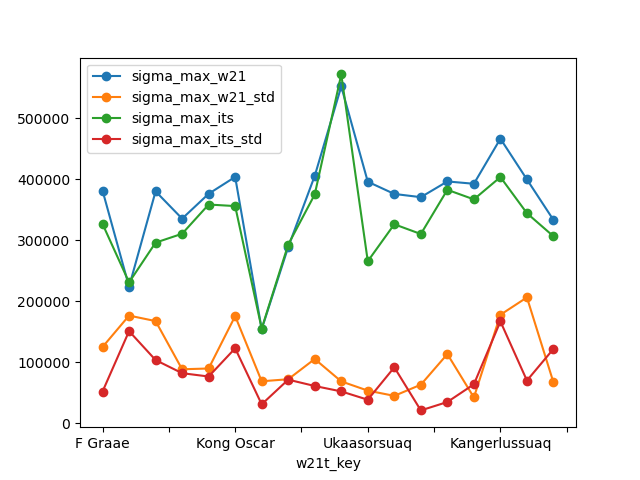

In [89]:
sigmas.plot(marker='o')